In [14]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"1csBBZRrQwinTy219jN-5YlzQ8w2-ciZy"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Bowling_Video.mp4')        # replace the file name with your file

In [15]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('Bowling_Video.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [17]:
import cv2
import matplotlib.pyplot as plt

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


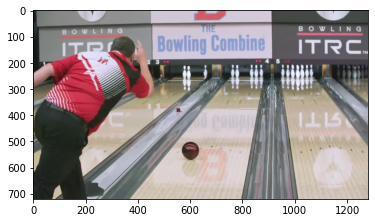

In [18]:
vidcap = cv2.VideoCapture('Bowling_Video.mp4')
for i in range(50):
  success,image = vidcap.read()
  if(success ==1):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(i)
plt.imshow(image)

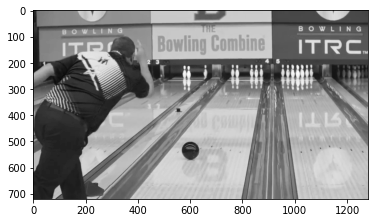

In [19]:
plt.imshow(image[:,:,1], cmap='gray')

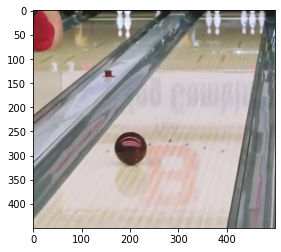

In [20]:
crop_img = image[250:700, 400:900,]
plt.imshow(crop_img)

In [21]:
vidcap = cv2.VideoCapture('Bowling_Video.mp4')
count = 0
image = [];
success = 1;
while success: 
  print('Reading frame number: '+str(count+1))
  success,image = vidcap.read() #New frames keep coming in image variable

  if(success):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Opencv reads images in BGR format. Change it to RGB
    image = image[250:700, 400:900,]

  if(success==1 and (count+1)%10==0):  #Display every 10th image and show its shape
    print(image.shape)
    plt.imshow(image)
    plt.show()
  count += 1


Output hidden; open in https://colab.research.google.com to view.

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
vidcap = cv2.VideoCapture('Bowling_Video.mp4')
fps = vidcap.get(cv2.CAP_PROP_FPS)
count = 0
width = 0
height = 0
image = [];
image_temp = [];
# out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
success = 1;
while success: 
  success,image = vidcap.read() #New frames keep coming in image variable
  # width,height,layers = image.shape
  if(success==1): 
    image=image[0:720,350:900]
      # Convert to grayscale. 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    
    # Blur using 3 * 3 kernel. 
    gray_blurred = cv2.medianBlur(gray,5)
    # Apply Hough transform on the blurred image. 
    detected_circles = cv2.HoughCircles(gray_blurred, 
            cv2.HOUGH_GRADIENT, 1, 20, param1 = 220, 
          param2 = 30, minRadius = 0, maxRadius = 40) 
    try:
      detected_circles = np.uint16(np.around(detected_circles)) 
    except:
      continue;
    for pt in detected_circles[0, :]: 
      a, b, r = pt[0], pt[1], pt[2] 

      # Draw the circumference of the circle. 
      cv2.circle(image, (a, b), r, (255, 255, 255), -1) 
      image_temp.append(image)
      cv2.waitKey(0)

    # else:
    #   break
  count +=1

fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video=cv2.VideoWriter('video89.avi', fourcc, 60,(550,720))
for img in image_temp:
    video.write(img)
video.release()
          

          

In [26]:
!ffmpeg -i video89.avi video89.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [27]:

mp4 = open('video89.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [28]:
time = count/fps
dist_ally=60/3.281
speed=dist_ally/time
print('speed in m/sec: ' +str(speed))



speed in m/sec: 6.164193569376286


**Assignment 1:**
1. Write a code to repaint the ball white and playback the new video. (2 marks)
2. Write a code to measure the speed of the ball in m/s if it is known that the bowling ally is 60ft long. (1 mark)

May refer to following code snippet for video writting: https://theailearner.com/2018/10/15/creating-video-from-images-using-opencv-python/

Hint: Try to cut the ball region from one image matrix and search for it in successive frames using correlation. Constrain your region of search within the alley.